# Preprocessing
#### UD2. Aprendizaxe Supervisada
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Cristina Gómez Alonso

Para limpiar el conjunto de datos, es necesario manejar los valores que faltan y las features categóricas, porque la matemática subyacente en la mayoría de los modelos de Machine Learning asume que los datos son numéricos y no contienen valores desconocidos.
Además, la librería Scikit Learn devuelve un error si se intenta entrenar un modelo como Regresión Lineal o Regresión Logística utilizando datos que contienen valores perdidos o no numéricos.
Es por ello que en este notebook vamos a trabajar con:

* Valores missing
* Datos categóricos
* Escalado y normalización

## 1. Valores missing

La falta de datos es quizás el rasgo más común de los datos impuros. Estos valores suelen tomar la forma de NaN o None.

Hay varias maneras de rellenar los valores que faltan:

* Puedes eliminar las líneas con los datos si el conjunto de datos es lo suficientemente grande y el porcentaje de valores perdidos no es alto, más del 50%, por ejemplo.
* Puedes rellenar todas las variables nulas con 0, si se trata de valor numéricos.
* Puedes rellenar los valores perdidos con la media, la mediana o la moda (que es el valor más frecuente de la columna).
* También puedes decidir rellenar los valores que faltan con cualquier valor que venga directamente después en la misma columna.

Estas decisiones dependen del tipo de datos, de lo que se quiera hacer con ellos y de la causa de la falta de valores. En realidad, el hecho de que algo sea popular no significa necesariamente que sea la elección correcta. La estrategia más común es utilizar el valor medio, pero dependiendo de los datos, se puede llegar a un enfoque totalmente diferente.

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline

df_missing=pd.read_excel("data/Sample - Superstore.xls",sheet_name="Missing")
df_missing.head()

,Customer,Product,Sales,Quantity,Discount,Profit
0,Brosina Hoffman,NaN,1706.184,9.0,0.2,85.3092
1,Brosina Hoffman,Phones,911.424,4.0,0.2,68.3568
2,Zuschuss Donatelli,Art,8.560,2.0,0.0,2.4824
3,Zuschuss Donatelli,Phones,NaN,3.0,0.2,16.0110
4,Zuschuss Donatelli,Binders,22.720,4.0,0.2,7.3840


In [39]:
df_missing.values

array([['Brosina Hoffman', nan, 1706.1840000000002, 9.0, 0.2,
        85.3091999999998],
       ['Brosina Hoffman', 'Phones', 911.424, 4.0, 0.2,
        68.35680000000002],
       ['Zuschuss Donatelli', 'Art', 8.56, 2.0, 0.0, 2.4823999999999993],
       ['Zuschuss Donatelli', 'Phones', nan, 3.0, 0.2, 16.01099999999998],
       ['Zuschuss Donatelli', 'Binders', 22.72, 4.0, 0.2,
        7.383999999999999],
       ['Eric Hoffmann', 'Binders', 11.648000000000001, nan, 0.2, 4.2224],
       ['Eric Hoffmann', 'Accessories', 90.57000000000001, 3.0, 0.0,
        11.774100000000004],
       ['Ruben Ausman', nan, 77.88, 2.0, 0.0, nan],
       [nan, 'Accessories', 13.98, 2.0, 0.0, 6.151200000000001],
       ['Kunst Miller', 'Binders', 25.824, 6.0, 0.2, 9.3612],
       ['Kunst Miller', 'Paper', 146.73, 3.0, 0.0, 68.9631]], dtype=object)

In [40]:
df_missing.isnull()

,Customer,Product,Sales,Quantity,Discount,Profit
0,False,True,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,True,False,False,False
4,False,False,False,False,False,False
5,False,False,False,True,False,False
6,False,False,False,False,False,False
7,False,True,False,False,False,True
8,True,False,False,False,False,False
9,False,False,False,False,False,False


In [41]:
df_missing.isnull().sum()

Customer    1
Product     2
Sales       1
Quantity    1
Discount    0
Profit      1
dtype: int64

In [42]:
for c in df_missing.columns:
    miss = df_missing[c].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(c,miss))
    else:
        print("{} has NO missing value!".format(c))

Customer has 1 missing value(s)
Product has 2 missing value(s)
Sales has 1 missing value(s)
Quantity has 1 missing value(s)
Discount has NO missing value!
Profit has 1 missing value(s)


### Rellenado de valores nulos

In [43]:
df_missing.fillna('FILL')

,Customer,Product,Sales,Quantity,Discount,Profit
0,Brosina Hoffman,FILL,1706.184,9.0,0.2,85.3092
1,Brosina Hoffman,Phones,911.424,4.0,0.2,68.3568
2,Zuschuss Donatelli,Art,8.56,2.0,0.0,2.4824
3,Zuschuss Donatelli,Phones,FILL,3.0,0.2,16.011
4,Zuschuss Donatelli,Binders,22.72,4.0,0.2,7.384
5,Eric Hoffmann,Binders,11.648,FILL,0.2,4.2224
6,Eric Hoffmann,Accessories,90.57,3.0,0.0,11.7741
7,Ruben Ausman,FILL,77.88,2.0,0.0,FILL
8,FILL,Accessories,13.98,2.0,0.0,6.1512
9,Kunst Miller,Binders,25.824,6.0,0.2,9.3612


In [44]:
df_missing[['Customer','Product']].fillna('FILL')

,Customer,Product
0,Brosina Hoffman,FILL
1,Brosina Hoffman,Phones
2,Zuschuss Donatelli,Art
3,Zuschuss Donatelli,Phones
4,Zuschuss Donatelli,Binders
5,Eric Hoffmann,Binders
6,Eric Hoffmann,Accessories
7,Ruben Ausman,FILL
8,FILL,Accessories
9,Kunst Miller,Binders


In [45]:
df_missing['Sales'].fillna(method='ffill')

0     1706.184
1      911.424
2        8.560
3        8.560
4       22.720
5       11.648
6       90.570
7       77.880
8       13.980
9       25.824
10     146.730
Name: Sales, dtype: float64

In [46]:
df_missing['Sales'].fillna(method='bfill')

0     1706.184
1      911.424
2        8.560
3       22.720
4       22.720
5       11.648
6       90.570
7       77.880
8       13.980
9       25.824
10     146.730
Name: Sales, dtype: float64

In [47]:
df_missing['Sales'].fillna(df_missing.mean()['Sales'])

C:\Users\CRISTI~1\AppData\Local\Temp/ipykernel_10804/1186702620.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_missing['Sales'].fillna(df_missing.mean()['Sales'])


0     1706.184
1      911.424
2        8.560
3      301.552
4       22.720
5       11.648
6       90.570
7       77.880
8       13.980
9       25.824
10     146.730
Name: Sales, dtype: float64

Busca información sobre los calculadores SimpleImputer y IterativeImputer. ¿Para qué sirven?

In [48]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df_missing['Sales'] = imp.fit_transform(df_missing[['Sales']])
df_missing

#Si quisiéramos aplicar múltiples estrategías, sería necesario utilizar fillna múltiples o ColumnTransformer como composer
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

A = [[7,2,3],[4,np.nan,6],[10,5,np.nan]]

column_trans = ColumnTransformer(
    [('imp_col1', SimpleImputer(strategy='mean'), [1]),
     ('imp_col2', SimpleImputer(strategy='constant', fill_value=29), [2])],
    remainder='passthrough')

print(column_trans.fit_transform(A)[:, [2,0,1]])
# [[7 2.0 3]
#  [4 3.5 6]
#  [10 5.0 29]]

#El IterativeImputer se utiliza para recalcular valores de columnas relacionados/asociados. Más info: https://scikit-learn.org/stable/modules/impute.html#multivariate-feature-imputation

[[7 2.0 3]
 [4 3.5 6]
 [10 5.0 29]]


### Borrado de valores nulos

In [49]:
# only drop rows where all columns are NaN
df_missing.dropna(how='all')

,Customer,Product,Sales,Quantity,Discount,Profit
0,Brosina Hoffman,NaN,1706.184,9.0,0.2,85.3092
1,Brosina Hoffman,Phones,911.424,4.0,0.2,68.3568
2,Zuschuss Donatelli,Art,8.560,2.0,0.0,2.4824
3,Zuschuss Donatelli,Phones,301.552,3.0,0.2,16.0110
4,Zuschuss Donatelli,Binders,22.720,4.0,0.2,7.3840
5,Eric Hoffmann,Binders,11.648,NaN,0.2,4.2224
6,Eric Hoffmann,Accessories,90.570,3.0,0.0,11.7741
7,Ruben Ausman,NaN,77.880,2.0,0.0,NaN
8,NaN,Accessories,13.980,2.0,0.0,6.1512
9,Kunst Miller,Binders,25.824,6.0,0.2,9.3612


In [50]:
# Keep only the rows with at least 5 non-NA values.
df_missing.dropna(thresh=5, inplace=True)
df_missing


,Customer,Product,Sales,Quantity,Discount,Profit
0,Brosina Hoffman,NaN,1706.184,9.0,0.2,85.3092
1,Brosina Hoffman,Phones,911.424,4.0,0.2,68.3568
2,Zuschuss Donatelli,Art,8.560,2.0,0.0,2.4824
3,Zuschuss Donatelli,Phones,301.552,3.0,0.2,16.0110
4,Zuschuss Donatelli,Binders,22.720,4.0,0.2,7.3840
5,Eric Hoffmann,Binders,11.648,NaN,0.2,4.2224
6,Eric Hoffmann,Accessories,90.570,3.0,0.0,11.7741
8,NaN,Accessories,13.980,2.0,0.0,6.1512
9,Kunst Miller,Binders,25.824,6.0,0.2,9.3612
10,Kunst Miller,Paper,146.730,3.0,0.0,68.9631


In [51]:
# only drop rows where NaN appear in specific columns (here: 'Sales')
df_missing.dropna(subset=['Sales'])

,Customer,Product,Sales,Quantity,Discount,Profit
0,Brosina Hoffman,NaN,1706.184,9.0,0.2,85.3092
1,Brosina Hoffman,Phones,911.424,4.0,0.2,68.3568
2,Zuschuss Donatelli,Art,8.560,2.0,0.0,2.4824
3,Zuschuss Donatelli,Phones,301.552,3.0,0.2,16.0110
4,Zuschuss Donatelli,Binders,22.720,4.0,0.2,7.3840
5,Eric Hoffmann,Binders,11.648,NaN,0.2,4.2224
6,Eric Hoffmann,Accessories,90.570,3.0,0.0,11.7741
8,NaN,Accessories,13.980,2.0,0.0,6.1512
9,Kunst Miller,Binders,25.824,6.0,0.2,9.3612
10,Kunst Miller,Paper,146.730,3.0,0.0,68.9631


In [52]:
df_missing.dropna(axis=0)

,Customer,Product,Sales,Quantity,Discount,Profit
1,Brosina Hoffman,Phones,911.424,4.0,0.2,68.3568
2,Zuschuss Donatelli,Art,8.560,2.0,0.0,2.4824
3,Zuschuss Donatelli,Phones,301.552,3.0,0.2,16.0110
4,Zuschuss Donatelli,Binders,22.720,4.0,0.2,7.3840
6,Eric Hoffmann,Accessories,90.570,3.0,0.0,11.7741
9,Kunst Miller,Binders,25.824,6.0,0.2,9.3612
10,Kunst Miller,Paper,146.730,3.0,0.0,68.9631


In [53]:
df_missing.dropna(axis=1)

,Sales,Discount,Profit
0,1706.184,0.2,85.3092
1,911.424,0.2,68.3568
2,8.560,0.0,2.4824
3,301.552,0.2,16.0110
4,22.720,0.2,7.3840
5,11.648,0.2,4.2224
6,90.570,0.0,11.7741
8,13.980,0.0,6.1512
9,25.824,0.2,9.3612
10,146.730,0.0,68.9631


In [54]:
df_missing.dropna(axis=1,thresh=10)

,Sales,Discount,Profit
0,1706.184,0.2,85.3092
1,911.424,0.2,68.3568
2,8.560,0.0,2.4824
3,301.552,0.2,16.0110
4,22.720,0.2,7.3840
5,11.648,0.2,4.2224
6,90.570,0.0,11.7741
8,13.980,0.0,6.1512
9,25.824,0.2,9.3612
10,146.730,0.0,68.9631


## 2. Datos categóricos

En Machine Learning solo utilizamos valores numéricos, tipo de datos flotantes o enteros. Sin embargo, los conjuntos de datos a menudo contienen el objeto como tipo de datos, por lo tanto se hace necesario transformarlo en numérico. En la mayoría de los casos, los valores categóricos son discretos y puedes ser codificados como variables ficticias, asignando un número para cada categoría.
[Tutorial DataCamp super completo](https://www.datacamp.com/community/tutorials/categorical-data)

In [55]:
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class1'],
    ['red', 'L', 13.5, 'class2'],
    ['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


### Sustitución de los valores de la columna size por valores numéricos concretos

In [56]:
size_mapping = {'XL': 3, 'L': 2, 'M': 1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


### Sustitución de los valores de la columna classlabel con un LabelEncoder

In [57]:
df['classlabel'].unique()

array(['class1', 'class2'], dtype=object)

In [58]:
from sklearn.preprocessing import LabelEncoder
class_label_encoder = LabelEncoder()
df['classlabel'] = class_label_encoder.fit_transform(df['classlabel'].values)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


### Sustitución de los valores de la columna color con una columna para cada color

In [59]:
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


Busca más información sobre otras transformaciones de datos categóricos y pon ejemplos sobre este df [Tutorial DataCamp super completo](https://www.datacamp.com/community/tutorials/categorical-data)

## 3. Escalado y estandarizado

[Fuente](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)
* Scale generally means to change the range of the values. The shape of the distribution doesn’t change. Think about how a scale model of a building has the same proportions as the original, just smaller. That’s why we say it is drawn to scale. The range is often set at 0 to 1.
* Standardize generally means changing the values so that the distribution’s standard deviation equals one. Scaling is often implied.
* Normalize can be used to mean either of the above things (and more!). I suggest you avoid the term normalize, because it has many definitions and is prone to creating confusion.

In [60]:
import pandas as pd

df_wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
    header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines','Proline']
print('Class labels', np.unique(df_wine['Class label']))
df_wine

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [61]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
len(X_test), len(X_train)

(54, 124)

### MinMaxScaler

For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum.
MinMaxScaler preserves the shape of the original distribution. It doesn’t meaningfully change the information embedded in the original data.
Note that MinMaxScaler doesn’t reduce the importance of outliers.
The default range for the feature returned by MinMaxScaler is 0 to 1.

In [62]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [63]:
X_train_norm


array([[0.72043011, 0.20378151, 0.53763441, ..., 0.48717949, 1.        ,
        0.5854251 ],
       [0.31989247, 0.08403361, 0.31182796, ..., 0.27350427, 0.64102564,
        0.        ],
       [0.60215054, 0.71218487, 0.48387097, ..., 0.04273504, 0.10622711,
        0.42348178],
       ...,
       [0.37365591, 0.1512605 , 0.44623656, ..., 0.44444444, 0.61904762,
        0.02672065],
       [0.77150538, 0.16596639, 0.40860215, ..., 0.31623932, 0.75457875,
        0.54493927],
       [0.84139785, 0.34033613, 0.60215054, ..., 0.06837607, 0.16117216,
        0.28178138]])

In [64]:
X_test_norm

array([[ 0.72849462,  0.16386555,  0.47849462,  0.29896907,  0.52173913,
         0.53956835,  0.74311927,  0.13461538,  0.37974684,  0.4364852 ,
         0.32478632,  0.70695971,  0.60566802],
       [ 0.47311828,  0.37394958,  0.60215054,  0.58762887,  0.45652174,
         0.13669065,  0.27217125,  0.19230769,  0.26582278,  0.90926457,
        -0.05128205,  0.07326007,  0.13603239],
       [ 0.36021505,  0.05042017,  0.43010753,  0.43298969,  0.18478261,
         0.86330935,  0.80428135,  0.09615385,  0.45886076,  0.30276982,
         0.58119658,  0.58608059,  0.08744939],
       [ 0.68010753,  0.17647059,  0.59139785,  0.51030928,  0.5       ,
         0.66906475,  0.70642202,  0.11538462,  0.64240506,  0.47468959,
         0.37606838,  0.64468864,  0.65425101],
       [ 0.54301075,  1.03151261,  0.41397849,  0.56185567,  0.17391304,
         0.54676259,  0.66666667,  0.30769231,  0.50316456,  0.1260745 ,
         0.16239316,  0.67032967,  0.05506073],
       [ 0.14247312,  0.243697

In [65]:
X_train_norm[0]

array([0.72043011, 0.20378151, 0.53763441, 0.30927835, 0.33695652,
       0.54316547, 0.73700306, 0.25      , 0.40189873, 0.24068768,
       0.48717949, 1.        , 0.5854251 ])

Notice how the features are all on the same relative scale. The relative spaces between each feature’s values have been maintained.
MinMaxScaler isn’t a bad place to start, unless you know you want your feature to have a normal distribution or you have outliers and you want them to have reduced influence.

### RobustScaler

RobustScaler transforms the feature vector by subtracting the median and then dividing by the interquartile range (75% value — 25% value).
Like MinMaxScaler, our feature with large values — normal-big — is now of similar scale to the other features. Note that RobustScaler does not scale the data into a predetermined interval like MinMaxScaler. It does not meet the strict definition of scale I introduced earlier.
Note that the range for each feature after RobustScaler is applied is larger than it was for MinMaxScaler.
Use RobustScaler if you want to reduce the effects of outliers, relative to MinMaxScaler.

### StandardScaler

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. StandardScaler does not meet the strict definition of scale I introduced earlier.
StandardScaler results in a distribution with a standard deviation equal to 1. The variance is equal to 1 also, because variance = standard deviation squared. And 1 squared = 1.
StandardScaler makes the mean of the distribution approximately 0.
Deep learning algorithms often call for zero mean and unit variance. Regression-type algorithms also benefit from normally distributed data with small sample sizes.

In [66]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [67]:
X_train_std

array([[ 0.91083058, -0.46259897, -0.01142613, ...,  0.65706596,
         1.94354495,  0.93700997],
       [-0.95609928, -0.96608672, -1.53725357, ..., -0.40859506,
         0.58118003, -1.41336684],
       [ 0.35952243,  1.67501572, -0.37471838, ..., -1.55950896,
        -1.44846566,  0.28683658],
       ...,
       [-0.70550467, -0.68342693, -0.62902295, ...,  0.44393375,
         0.49776993, -1.30608823],
       [ 1.14889546, -0.6215951 , -0.88332752, ..., -0.19546286,
         1.0121322 ,  0.77446662],
       [ 1.47466845,  0.11155374,  0.42452457, ..., -1.43162964,
        -1.23994042, -0.28206514]])

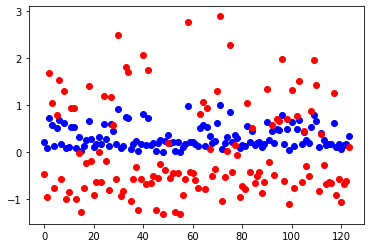

In [68]:
from matplotlib.pyplot import scatter

xx = np.arange(len(X_train_std))
yy1 = X_train_norm[:,1]
yy2 = X_train_std[:,1]
scatter(xx, yy1, color='b')
scatter(xx, yy2, color='r')

### Normalizer

Normalizer works on the rows, not the columns! I find that very unintuitive. It’s easy to miss this information in the docs.
By default, L2 normalization is applied to each observation so the that the values in a row have a unit norm. Unit norm with L2 means that if each element were squared and summed, the total would equal 1. Alternatively, L1 (aka taxicab or Manhattan) normalization can be applied instead of L2 normalization.
Normalizer does transform all the features to values between -1 and 1 (this text updated July 2019). In our example, normal_big ends up with all its values transformed to .9999999.
In most cases one of the other preprocessing tools above will be more helpful.
Again, scikit-learn’s Normalizer works on the rows, not the columns.

## Ejercicio

Carga el dataset sample sample_data.csv que tienes en el directorio data.
1. Consulta cuántos valores nulos tiene el dataset y en qué columnas.
2. Borra las filas que tengan valores nulos en las columnas Country y Purchased.
3. Sustituye los valores nulos de las columnas Age y Salary por la media.
4. Transforma la columna Country con un OneHotEncoder.
5. Transforma la columna Purchased con un LabelEncoder.
6. Divide el dataset en 4 grupos (training y testing).
6. Escala las columnas Age y Salary con un StandardScaler.

In [75]:
df2 = pd.read_csv('data/sample_data.csv')
df2.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17     True
18    False
19    False
20    False
21    False
22     True
23     True
24    False
25    False
26     True
27    False
28    False
dtype: bool

In [76]:
# Borramos duplicados
df2.drop_duplicates(inplace=True)
df2.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
18    False
19    False
20    False
21    False
24    False
25    False
27    False
28    False
dtype: bool

In [77]:
df2.dropna(subset=['Country','Purchased'], inplace=True)
df2

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Nigeria,18.0,15000.0,No
5,Germany,40.0,NaN,Yes
6,France,35.0,58000.0,Yes
7,Spain,NaN,52000.0,No
8,France,48.0,79000.0,Yes
9,Germany,50.0,83000.0,No


In [80]:
# Opción 1 columna a columna
#df2['Age'].fillna(df2.mean()['Age'].round(0), inplace=True)
#df2['Salary'].fillna(df2.mean()['Salary'].round(0), inplace=True)
#df2
# Opción 2
#df2[['Age','Salary']] = df2[['Age','Salary']].fillna(df2.mean()[['Age','Salary']])
#df2
# Opción 3
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df2[['Age','Salary']] = imp.fit_transform(df2[['Age','Salary']].values)
df2

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Nigeria,18.000000,15000.000000,No
5,Germany,40.000000,50636.363636,Yes
6,France,35.000000,58000.000000,Yes
7,Spain,35.952381,52000.000000,No
8,France,48.000000,79000.000000,Yes
9,Germany,50.000000,83000.000000,No


In [57]:
X = df2[['Country','Age','Salary']]
X = df2.iloc[:,:-1]
X = pd.get_dummies(X)

#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder

#ct = ColumnTransformer(transformers=[('Country', OneHotEncoder(), [0])],
 #                      remainder='passthrough')
#X = ct.fit_transform(X)
#print(ct.get_feature_names())
X

,Age,Salary,Country_France,Country_Germany,Country_Nigeria,Country_Spain
0,44.0,72000.0,1,0,0,0
1,27.0,48000.0,0,0,0,1
2,30.0,54000.0,0,1,0,0
3,38.0,61000.0,0,0,0,1
4,18.0,15000.0,0,0,1,0
5,40.0,50636.0,0,1,0,0
6,35.0,58000.0,1,0,0,0
7,36.0,52000.0,0,0,0,1
8,48.0,79000.0,1,0,0,0
9,50.0,83000.0,0,1,0,0


In [58]:
y = df2['Purchased']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0])

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
#X_train e X_test son dataframes mientras que y_train e y_test son arrays numpy
print(X_train.shape, X_test.shape)
print(X_test)
y_train.columns


(17, 6) (6, 6)
     Age   Salary  Country_France  Country_Germany  Country_Nigeria  \
11  50.0  60000.0               0                0                1   
10  37.0  67000.0               1                0                0   
27  30.0  30000.0               0                0                1   
16  34.0  44000.0               0                0                0   
25  45.0  50000.0               0                1                0   
1   27.0  48000.0               0                0                0   

    Country_Spain  
11              0  
10              0  
27              0  
16              1  
25              0  
1               1  


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [84]:
from sklearn.preprocessing import StandardScaler

#Opción 1
scaler = StandardScaler()
X_train[['Age', 'Salary']] = scaler.fit_transform(X_train[['Age','Salary']].values)
X_test[['Age', 'Salary']] = scaler.transform(X_test[['Age','Salary']].values)
X_train

#Opción 2
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)
#X_train


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Age,Salary,Country_France,Country_Germany,Country_Nigeria,Country_Spain
15,-0.064361,-0.389761,0,0,1,0
28,-0.793789,-1.767745,0,0,1,0
19,-0.793789,1.283505,0,0,1,0
8,1.516066,1.381933,1,0,0,0
6,-0.064361,0.348445,1,0,0,0
20,0.057210,0.299231,0,0,0,1
4,-2.131074,-1.767745,0,0,1,0
2,-0.672218,0.151590,0,1,0,0
5,0.543495,-0.013965,0,1,0,0
21,1.029781,-0.143692,1,0,0,0


# Webgrafia


[Web Bogotobogo](https://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Preprocessing-Missing-Data-Categorical-Data.php)
[Tutorial DataCamp sobre Categorical Data](https://www.datacamp.com/community/tutorials/categorical-data)
[Curso de Tirtjakupto Sarkar](https://github.com/tirthajyoti/Machine-Learning-with-Python)
[DataCamp](https://www.datacamp.com/)
[Aprende IA](https://aprendeia.com/limpieza-y-procesamiento-de-datos-con-codigo-en-python/)


# Licencia

[Attributon-ShacerAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)

Puedes utilizar libremente este material, con las siguientes condiciones:

* Atribuir la autoría a este documento.
* Si lo utilizas y haces cambios, deberás liberarlo también bajo la misma licencia.